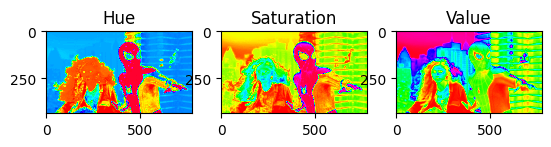

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('spider.png', cv.IMREAD_COLOR)
#imgc = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imgh = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h_img, s_img , v_img = cv.split(imgh)

fig, ax= plt.subplots(1,3)
ax[0].imshow(h_img, cmap='hsv')
ax[0].set_title('Hue')
ax[1].imshow(s_img, cmap='hsv')
ax[1].set_title('Saturation')
ax[2].imshow(v_img, cmap='hsv')
ax[2].set_title('Value')
plt.show()
